# How to Automate Feature Engineering with AI

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)


# Table of Contents

1. [How to Automate Feature Engineering with AI](#how-to-automate-feature-engineering-with-ai)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The feature engineering recipe](#the-feature-engineering-recipe)
8. [Feature Engineer Function](#feature-engineer-function)
9. [Feature Engineered Data As Pandas Data Frame](#feature-engineered-data-as-pandas-data-frame)
10. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries

In [2]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import FeatureEngineeringAgent

### Setup AI and Logging

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [4]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7f7968932e30>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7f7998ac50f0>, root_client=<openai.OpenAI object at 0x7f79a88c2ec0>, root_async_client=<openai.AsyncOpenAI object at 0x7f7968930fa0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Load a Dataset

Next, let's load a customer churn data set that we will clean up. 

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent

Run this code to create the agent with `make_feature_engineering_agent()`.

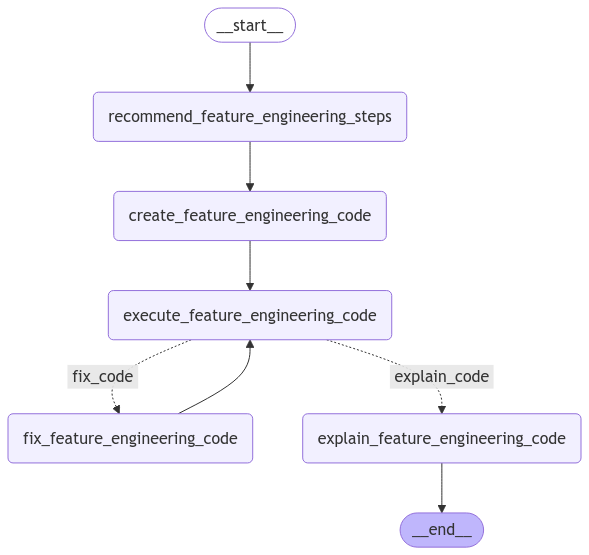

In [6]:
feature_engineering_agent = FeatureEngineeringAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

feature_engineering_agent

The main inputs to the Feature Engineering Agent are:

- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" (optional). See the documentation for the standard feature engineering steps that are evaluated for application by the LLM. 
- **target_variable**: The column name of the target variable (optional).
- **data_raw**: The raw data to have engineered feature transformations applied.
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [7]:
feature_engineering_agent.invoke(
    target_variable="Churn",
    user_instructions="Inspect the data. Make any new features and transformations that you think will be useful for predicting the target variable.",
    data_raw=df,
    max_retries=3,
    retry_count=0,
)

---FEATURE ENGINEERING AGENT----
    * RECOMMEND FEATURE ENGINEERING STEPS
    * CREATE FEATURE ENGINEERING CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/feature_engineer.py
    * EXECUTING AGENT CODE
    * EXPLAIN AGENT CODE


### Response

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [8]:
feature_engineering_agent.get_response()

{'messages': [AIMessage(content='# Feature Engineering Agent:\n\n The `feature_engineer` function performs several key feature engineering steps on the input dataset (`data_raw`). Here’s a concise breakdown of these steps:\n\n1. **Convert Data Types**: \n   - Converts the \'TotalCharges\' column to numeric type, coercing errors into NaNs.\n   - Changes the \'Churn\' column to a categorical type for better representation.\n\n2. **Remove Unique Value Features**: \n   - Drops the \'customerID\' column since it is unique for each entry and does not contribute to model training.\n\n3. **Remove Constant Features**: \n   - Identifies and removes columns that have only one unique value, as they provide no useful information.\n\n4. **High Cardinality Categorical Encoding**: \n   - For specified high cardinality features (\'InternetService\', \'Contract\', \'PaymentMethod\'), it consolidates infrequent categories (those making up less than 5% of the data) into a single category labeled "Other".\

#### Feature Engineered Data

In [9]:
feature_engineering_agent.get_data_engineered()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,AvgMonthlyCharge,ServiceCount
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,True,False,True,False,29.850000,True
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,True,False,False,False,False,True,1.675000,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,True,False,False,True,26.925000,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,True,False,False,False,False,False,0.940000,True
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,True,False,True,False,35.350000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,True,True,True,True,False,...,False,True,True,False,True,False,False,True,3.533333,True
7039,0,72,103.20,7362.90,0,False,True,True,True,False,...,False,True,True,False,True,True,False,False,1.433333,True
7040,0,11,29.60,346.45,0,False,True,True,False,True,...,False,False,False,False,True,False,True,False,2.690909,True
7041,1,4,74.40,306.60,1,True,True,False,True,False,...,False,False,False,False,True,False,False,True,18.600000,False


#### Feature Engineer Function

In [10]:
feature_engineering_agent.get_feature_engineer_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: feature_engineering_agent
# Time Created: 2025-01-09 22:36:39

def feature_engineer(data_raw):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import OneHotEncoder, LabelEncoder



    # Step 1: Convert Data Types
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')
    data_raw['Churn'] = data_raw['Churn'].astype('category')

    # Step 2: Remove Unique Value Features
    data_raw.drop(columns=['customerID'], inplace=True)

    # Step 3: Remove Constant Features
    constant_columns = [col for col in data_raw.columns if data_raw[col].nunique() <= 1]
    data_raw.drop(columns=constant_columns, inplace=True)

    # Step 4: High Cardinality Categorical Encoding
    high_cardinality_features = ['InternetService', 'Contract', 'PaymentMethod']
    for col in high_cardinality_features:
        if data_raw[col].nunique() / len(data_raw) > 0.05:
            # Consolidate infrequent categories into "Other"
            value_counts = data_raw[col].value_counts(normalize=True)
            threshold = 0.05
            to_replace = value_counts[value_counts < threshold].index
            data_raw[col].replace(to_replace, 'Other', inplace=True)

    # Step 5: One-Hot Encoding
    categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                            'MultipleLines', 'InternetService', 'OnlineSecurity', 
                            'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                            'StreamingTV', 'StreamingMovies', 'Contract', 
                            'PaperlessBilling', 'PaymentMethod']
    
    data_encoded = pd.get_dummies(data_raw, columns=categorical_features, drop_first=True)

    # Step 6: Convert Boolean to Integer
    data_encoded['SeniorCitizen'] = data_encoded['SeniorCitizen'].astype(int)
    data_encoded['Churn'] = data_encoded['Churn'].cat.codes  # Encode categorical target variable

    # Step 9: Analyze for Additional Features
    data_encoded['AvgMonthlyCharge'] = data_encoded['MonthlyCharges'] / data_encoded['tenure'].replace(0, np.nan)
    data_encoded['ServiceCount'] = (data_encoded['OnlineSecurity_Yes'].fillna(0) + 
                                     data_encoded['OnlineBackup_Yes'].fillna(0) + 
                                     data_encoded['DeviceProtection_Yes'].fillna(0) + 
                                     data_encoded['TechSupport_Yes'].fillna(0) + 
                                     data_encoded['StreamingTV_Yes'].fillna(0) + 
                                     data_encoded['StreamingMovies_Yes'].fillna(0))

    # Step 10: Final Review
    # Review for any additional transformations (if needed)

    return data_encoded
```

#### Feature Engineeering Recommended Steps

In [11]:
feature_engineering_agent.get_recommended_feature_engineering_steps(markdown=True)



# Recommended Feature Engineering Steps:
1. **Convert Data Types**: 
   - Convert `TotalCharges` from object to float, as it represents numerical values.
   - Ensure `Churn` is treated as a categorical variable for encoding.

2. **Remove Unique Value Features**: 
   - Remove `customerID` as it has unique values equal to the size of the dataset (7043).

3. **Remove Constant Features**: 
   - Check for any columns that have the same value across all rows and remove them if found. 

4. **High Cardinality Categorical Encoding**: 
   - Analyze categorical features for high cardinality. For features like `InternetService`, `Contract`, and `PaymentMethod`, if they have more than 5% unique values, consolidate infrequent categories into the "other" category.

5. **One-Hot Encoding**: 
   - Apply One-Hot Encoding to categorical features: `gender`, `Partner`, `Dependents`, `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract`, `PaperlessBilling`, and `PaymentMethod`.

6. **Convert Boolean to Integer**: 
   - Convert `SeniorCitizen`, `Churn`, and any categorical features that represent binary values into integers (1 for True, 0 for False) after one-hot encoding.

7. **Create Datetime Features**: 
   - If there are any datetime columns in future data, create relevant features such as year, month, day, day of the week, etc. (not applicable here based on provided data).

8. **Encode Target Variable**: 
   - If `Churn` is categorical, apply Label Encoding to convert it into numeric form (0 and 1).

9. **Analyze for Additional Features**: 
   - Examine existing features for potential new feature creation, such as:
     - Creating a feature for `MonthlyCharges` divided by `tenure` to understand the average monthly charge per period.
     - Creating a feature that sums the number of services subscribed (e.g., OnlineSecurity, OnlineBackup, etc.) to gauge customer engagement.

10. **Final Review**: 
   - Review the newly engineered features for any additional transformations or combinations that could enhance predictive performance before finalizing the dataset. 

No additional steps are required beyond those outlined above.

### Free Generative AI Data Science Workshop

If you want to learn how to build AI Agents that perform Data Science, Business Intelligence, Churn Modeling, Time Series Forecasting, and more, [register for my next free AI for Data Scientists workshop here.](https://learn.business-science.io/ai-register)